In [50]:
import pandas as pd #para ler os dados do arquivo texto
import matplotlib.pyplot as plt # para visualização dos dados
from sklearn.linear_model import LogisticRegression #para aplicação do modelo logistic Regression
from sklearn.ensemble import RandomForestClassifier #para aplicação do modelo Random Forest
from sklearn.naive_bayes import GaussianNB #para aplicação do modelo Naive Bayes
from sklearn.tree import DecisionTreeClassifier #para aplicação do modelo Decision Tree
from sklearn.model_selection import train_test_split #para dividir os dados em treino e teste
from mpl_toolkits.mplot3d import Axes3D #para plotar os dados em 3 dimensões já que são 3 variáveis independentes

## Ler e explorar os dados

In [51]:
#ler os dados do arquivo texto:
dfPoints = pd.read_csv("df_points.txt", delimiter = "\t")

In [52]:
#visualizar os dados:
dfPoints.head()


,Unnamed: 0,x,y,z,label
0,0,326.488285,188.988808,-312.205307,0.0
1,1,-314.287214,307.276723,-179.037412,1.0
2,2,-328.208910,181.627758,446.311062,1.0
3,3,-148.658890,147.027947,-27.477959,1.0
4,4,-467.065931,250.467651,-306.475330,1.0


Visualizando os dados de forma gráfica:

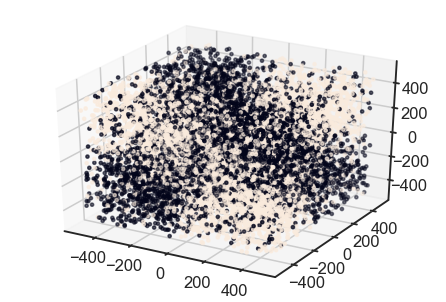

In [53]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dfPoints['x'],dfPoints['y'], dfPoints['z'], c=dfPoints['label'], s=10)

Algumas ações poderiam ser feitas com os dados neste momento para evitar "overfitting" tais como: "regularization" e "shuffling", mas como esta é uma operação simples, e no enuciado do teste foi pedido que "Please do not spend too much time in it", vou pular esta parte. No entanto, esta é uma etapa importantíssima, pois prepara o dado para o fitting ("training"), e isso aumenta muito a qualidade dos resultados do modelo. Portanto, estou assumindo aqui que os dados já estão "limpos".

## Preparando os dados de para treino, teste e avaliação dos modelos:

In [54]:
# configurando os eixos do modelo estatístico:
Y = dfPoints["label"] 
X = dfPoints[["x","y","z"]]

#Separando dados de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)


## Modelo Logistic Regression

In [55]:
#Treinando o modelo
model=LogisticRegression(n_jobs=1,C=1e5, solver="lbfgs")
model.fit(X_train, Y_train)

#Medindo eficácia do modelo
acc=(model.score(X_test,Y_test)*100)
print(f"Eficácia do modelo 'Logistic Regression': {acc}%")


Eficácia do modelo 'Logistic Regression': 56.93333333333334%


## Modelo comparativo #1: Decision Tree

In [56]:
#Treinando o modelo:
modelDT=DecisionTreeClassifier()
modelDT.fit(X_train,Y_train)

#Medindo a eficácia do modelo:
accDT=(modelDT.score(X_test,Y_test))*100
print(f"Eficácia do modelo 'Decision Trees': {accDT}%")

Eficácia do modelo 'Decision Trees': 65.96666666666667%


## Modelo comparativo #2: Random Forest

In [57]:
#Treinando o modelo:
modelRF=RandomForestClassifier()
modelRF.fit(X_train, Y_train)

#Medindo a eficácia do modelo:
accRF=(modelRF.score(X_test,Y_test)*100)
print(f"Eficácia do modelo 'Random Forest': {accRF}%")


Eficácia do modelo 'Random Forest': 75.23333333333333%


C:\Users\Wagner A Pinheiro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Modelo comparativo #3 Naive Bayes

In [58]:
#Treinando o modelo:
modelNB=GaussianNB()
modelNB.fit(X_train, Y_train)

#Medindo a eficácia do modelo:
accNB=(modelNB.score(X_test, Y_test)*100)
print(f"Eficácia do modelo 'Naive Bayes': {accNB}%")

Eficácia do modelo 'Naive Bayes': 56.8%


## Selecionando o melhor modelo

In [59]:
#mostrando os resultados numa tabela
dataset = pd.DataFrame({"Modelos":  ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes"], 
                        "Eficácia": [acc, accDT, accRF, accNB]})
dataset = dataset.sort_values("Eficácia", ascending=False)

dataset.head()


,Modelos,Eficácia
2,Random Forest,75.233333
1,Decision Tree,65.966667
0,Logistic Regression,56.933333
3,Naive Bayes,56.800000


### Conclusão:
    
O melhor modelo de classificação para este dataset é "Random Forest".
De fato, o modelo Random Forest é uma evolução do Decision Tree (que ficou em segundo lugar). Random Forest se utiliza de um
maior manuseio dos dados (booststraps), o que traz uma maior confiabilidade na previsão, pois ele testa os dados de várias formas. 
Já o modelo Logistic Regression não é muito preciso pois é muito suscetível ao "overfitting", ou seja, vai tender a prever o resultado de forma muito "amarrada" ao dado. A previsão somente será eficaz se os dados estiverem livres de qualquer vies.

